# ch.3　Python을 이용한 데이터 분석

## 3.6 정규분포와 응용

### 3.6.1 라이브러리 import

In [20]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3

%matplotlib inline

### 3.6.2 확률밀도
확률말도 함수의 계산식
$$
\mathcal{N}(x|\mu,\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma}}
$$

In [21]:
# 원주율 pi
np.pi

3.142

In [22]:
# 자연상수 e^1구하기. 저 1자리에 x 넣으면 e^x다.
np.exp(1)

2.718281828459045

In [23]:
# 확률변수가 3일때 확률밀도 구하기. 평균은 4, 분산은 0.64로 설정. (이제 얘네 조금 지겹다.)
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt(2 * sp.pi * sigma**2)) * \
    np.exp(- ((x - mu)**2) / (2 * sigma**2))

# 여기서 \는 코드가 길어 개행하는 역할

0.22831135673627742

In [24]:
# 3.4.8에 등장했었다.확률밀도를 구하는 함수
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [25]:
# 정규분포의 인스턴스 호출
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

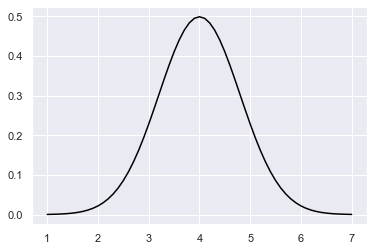

In [26]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 3.6.3 표본이 어떤 값 이하가 되는 비율

In [27]:
#또 평균 4, 표준편차 0.8인 정규분포의 난수 추출을 100000번 수행한다.
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [28]:
# 난수들 중 3이하인 값을 더하자.
np.sum(simulated_sample <= 3)

10371

In [29]:
# 위에서 더한 값을 전체 난수의 수로 나누면 비율이 구해진다. 3이하인 애들이 전체의 10%
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

### 3.6.4 누적분포함수
누적분포함수 F(x)  
F(x)=p(X <= x)

In [30]:
# 확률변수가 3이하가 될 확률 - 누적분포 함수구하기
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [31]:
# 확률변수가 4이하가 될 확률 - 누적분포 함수구하기
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 3.6.5 하측확률과 퍼센트포인트
하측확률: 데이터가 어떤 값 이하가 될 확률  
- 누적분포함수를 사용해서 구한다.  

퍼센트포인트: 반대로 어떤 확률이 될 기준치  
ex. '확률변수 x가 N보다 낮을 확률은 M퍼센트다.' 에서 N은 퍼센트포인트 M은 하측확률이다.

In [32]:
# 2.5%가 되는 하측확률 구하기
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [33]:
# 하측확률과 퍼센트포인트의 관계
sitagawa = stats.norm.cdf(loc = 4, scale = 0.8, x = 3) #x=3인 누적분포함수
stats.norm.ppf(loc = 4, scale = 0.8, q = sitagawa) #퍼센트 포인트 구하는 ppf 인자로
# cdf 함수 값 넣으면 x 값이 돌아온다.

3.0000000000000004

In [34]:
# 하측확률이 50%가 되는 퍼센트 포인트는 평균값과 같다.
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### 3.6.8 t값의 표본분포

'(표본평균-모평균) / 표준오차'로 계산해낸 t 값은 t분포를 따른다.

In [35]:
# 난수 시드 설정
np.random.seed(1)
# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)
# 정규분포 클래스의 인스턴스
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 시뮬레이션 시행
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof = 1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


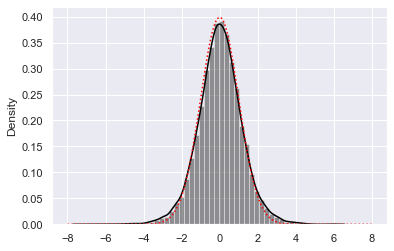

In [36]:
# t 값의 히스토그램
sns.distplot(t_value_array, color = 'black')

# 표준정규분포의 확률밀도
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'red', linestyle = 'dotted')

# distplot으로 하면 저절로 히스토그램과 확률밀도 함수의 크기를 맞춰주는데
# displot이나 histplot으로 하면 안된다. 이거 어떻게 해야할까요

### 3.6.9 t분포
t분포: 모집단분포가 정규분포일 때 t값의 표본분포  
자유도가 n일 경우 t분포는 t(n)으로 표기한다.  
샘플 사이즈가 10이라면 자유도는 9이다.  
t(n)의 분산=n/n-2
자유도가 커질수록 분산은 1에 가까워지고 표준정규분포와 거의 차이가 나지 않게된다.  

  
t분포는 표본(n)이 충분하지 못한 경우,
즉 n<30일 경우, 그리고 모분산(σ2)을 모르는 경우 사용한다.

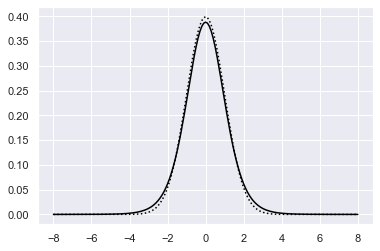

In [37]:
# t분포의 확률밀도와 표준정규분포의 확률밀도를 겹쳐서 표시해보자.
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black')

#실선이 t분포. 밑단이 더 넓은 분포이고 평균값과 크게 다른 데이터가 발생할 확률이 높다.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


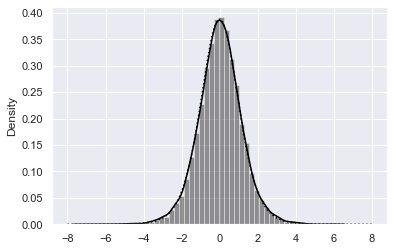

In [40]:
#시뮬레이션의 결과를 겹치면 커널밀도추정의 결과와도 일치한다.
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')

t분포의 의의는 모분산을 모르는 상황에서도 표본평균의 분포에 대해 얘기할 수 있다는 점에 있다. t분포를 만들 때 표본에서 계산한 표준오차로 표본평균을 표준화해버렸기 때문이다.